In [2]:
import lightkurve as lk

In [5]:
target = '114.1300 35.4236' # HD 11453 star
result = lk.search_targetpixelfile(target)
result

#,observation,target_name,productFilename,distance
0,TESS Sector 20,4076535,tess2019357164649-s0020-0000000004076535-0165-s_tp.fits,0.0


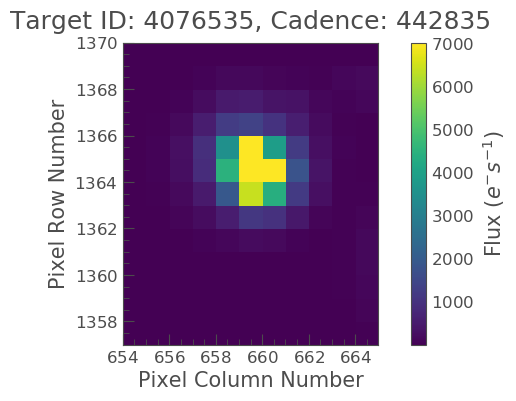

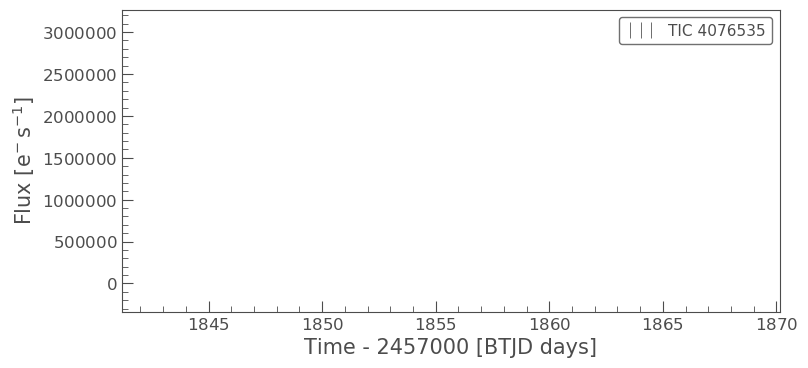

In [6]:
tpf = result.download()
tpf.plot()

lc = tpf.to_lightcurve()
lc.errorbar()

In [7]:
tpf.interact()

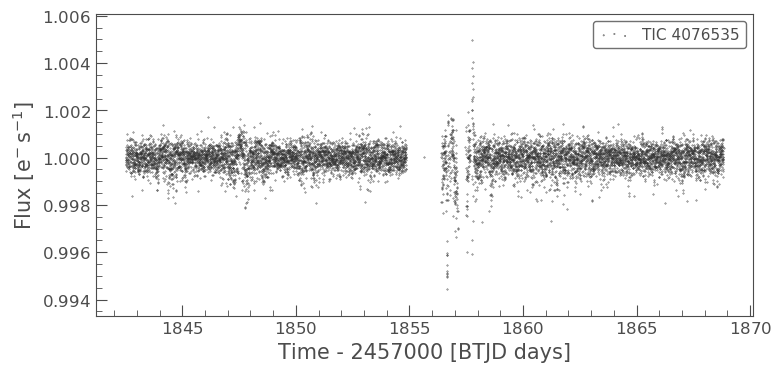

In [9]:
shape = int(round(lc.time.shape[0] * 0.05))
window = shape + 1 if shape % 2 == 0 else shape # window_length should be odd

# .fold(period=4.052, t0=1700).
scatter_lc = lc.remove_outliers().flatten(window_length=window).bin(binsize=2).scatter(s=0.1)

In [23]:
target = '329.55327238 +82.86966180' # sky coordinate of a star
tic = 2023948529
result = lk.search_targetpixelfile(target, sector=20)
result

#,observation,target_name,productFilename,distance
0,TESS Sector 20,470122265,tess2019357164649-s0020-0000000470122265-0165-s_tp.fits,0.0
1,TESS Sector 20,2023948529,tess2019357164649-s0020-0000002023948529-0165-s_tp.fits,0.0


In [24]:
tpfs = result.download_all()

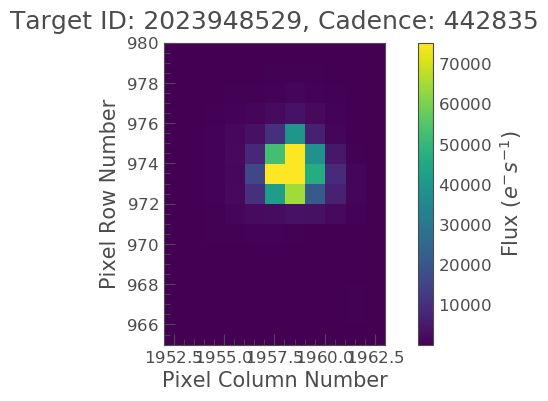

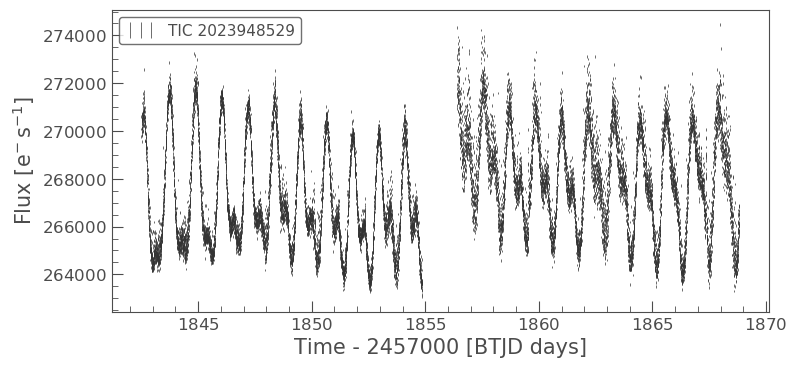

In [25]:
# tpf = result.download()
tpf = tpfs[1] # 2023948529
tpf.plot()

lc = tpf.to_lightcurve()
lc.errorbar()

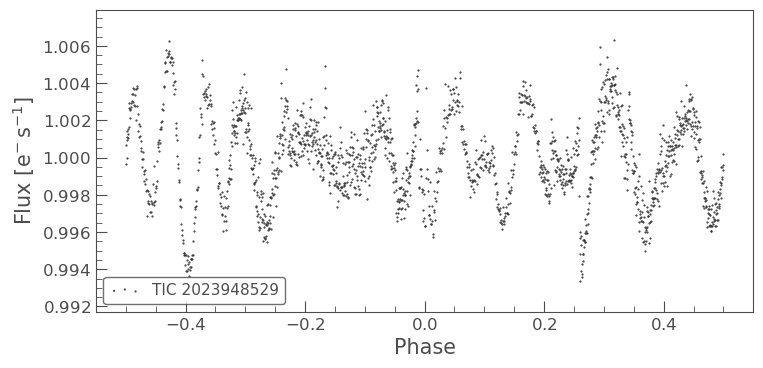

In [33]:
shape = int(round(lc.time.shape[0] * 0.05))
window = shape + 1 if shape % 2 == 0 else shape # window_length should be odd

# .fold(period=9.4138851, t0=1850.0934361).
scatter_lc = lc.remove_outliers().flatten(window_length=window).fold(period=9.4138851, t0=1850.0934361).bin(binsize=10).scatter(s=0.3)

In [34]:
tpf.interact()